In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer, load_digits
from mislabelling import symmetric_noise
from testing import *

In [2]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 10
TEST_SIZE = 0.25
ITERATIONS = 20

FIG_SIZE = (5,4)
FONT_SIZE = 10
plt.rcParams["figure.figsize"] = FIG_SIZE  # width, height in inches

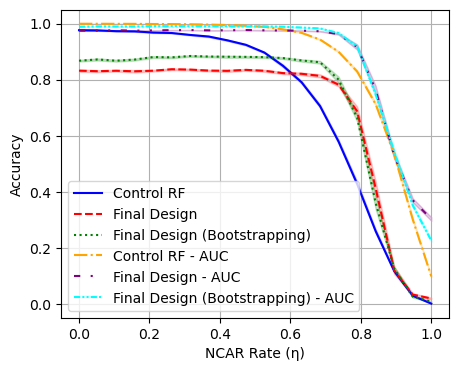

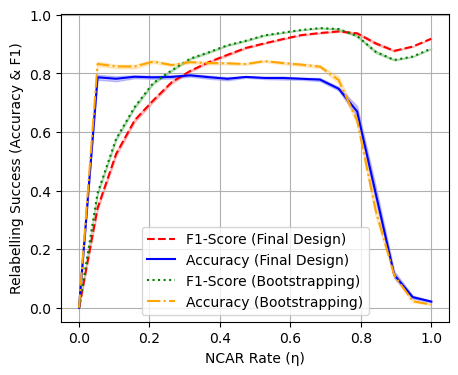

In [3]:
data = load_digits()

accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="F1-Score (Final Design)", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Accuracy (Final Design)", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="F1-Score (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Accuracy (Bootstrapping)", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

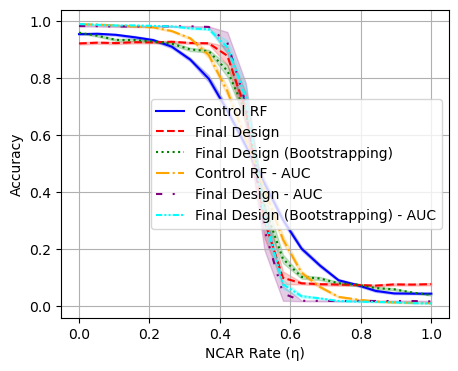

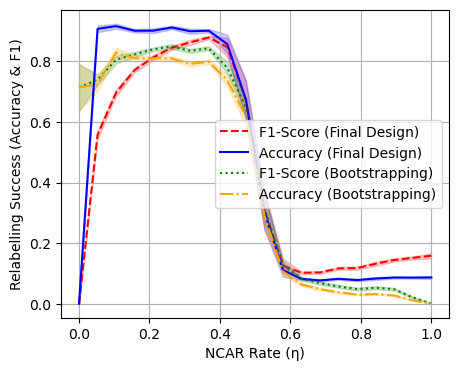

In [4]:
data = load_breast_cancer()

accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="F1-Score (Final Design)", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Accuracy (Final Design)", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="F1-Score (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Accuracy (Bootstrapping)", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

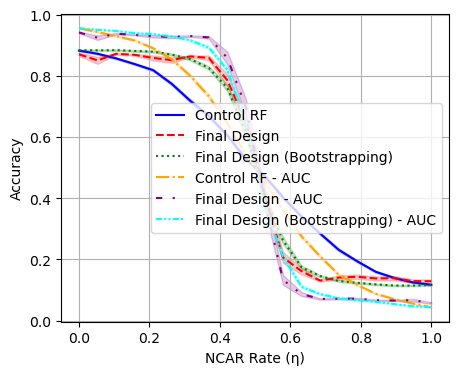

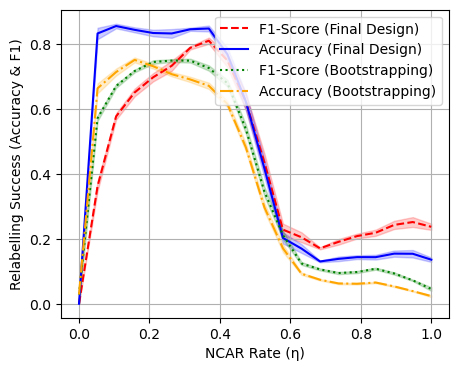

In [5]:
data = load_gmm5()

accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))


plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="F1-Score (Final Design)", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Accuracy (Final Design)", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="F1-Score (Bootstrapping)", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Accuracy (Bootstrapping)", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()